In [14]:
import numpy as np
import sys
from matplotlib import pyplot as plt

sys.path.append("../utils/")
from cca_core import get_cca_similarity

In [27]:
def get_svcca_similarity(x1, x2, verbose=True):
    x1 = x1 - np.mean(x1, axis=1, keepdims=True)
    x2 = x2 - np.mean(x2, axis=1, keepdims=True)
    
    # perform svd
    u1, s1, v1 = np.linalg.svd(x1, full_matrices=False)
    u2, s2, v2 = np.linalg.svd(x2, full_matrices=False)
    
    print(s1)
    print(s2)
    
    kept_dim = 20
    
    # remove direction with low variance
    new_x1 = np.dot(s1[:kept_dim]*np.eye(kept_dim), v1[:kept_dim])
    new_x2 = np.dot(s2[:kept_dim]*np.eye(kept_dim), v2[:kept_dim])
    
    return get_cca_similarity(new_x1, new_x2)

In [28]:
# Toy Example of CCA in action

# assume X_fake has 100 neurons and we have their activations on 1000 datapoints
A_fake = np.random.randn(100, 2000)
# Y_fake has 50 neurons with activations on the same 1000 datapoints
# Note X and Y do *not* have to have the same number of neurons
B_fake = np.random.randn(50, 2000)

# computing CCA simliarty between X_fake, Y_fake
# We expect similarity should be very low, because the fake activations are not correlated

results = get_svcca_similarity(A_fake, B_fake, verbose=True)

[54.1039336  53.44180504 53.35603221 52.99330173 52.68808225 52.53963207
 52.11166906 52.0457758  51.97909003 51.5928139  51.45948075 51.40831567
 50.83155925 50.70086155 50.60250367 50.46712242 50.15846851 49.78763724
 49.5171546  49.46348632 49.36442668 49.08470039 48.85696291 48.76762546
 48.62894154 48.5472922  48.4183468  48.07326188 47.8569195  47.74801157
 47.54417789 47.33335228 47.27079736 47.15386866 47.02583164 46.80248109
 46.59956638 46.39398299 46.24743598 46.1917597  45.96848988 45.79457071
 45.47783228 45.26631605 45.16671033 45.01417619 44.83552833 44.60722659
 44.55302437 44.35284457 44.29431631 44.06004794 43.91644128 43.71964061
 43.61757285 43.51600852 43.28235869 43.15154673 42.96630319 42.64781938
 42.56810391 42.51082345 42.42606337 42.34280271 41.9770129  41.86479318
 41.80123161 41.56190479 41.48218156 41.34705134 41.06135661 40.86643166
 40.64446371 40.39029787 40.29825317 40.24467439 39.81889898 39.74893244
 39.63789104 39.23422943 39.1865325  39.05548225 38

In [29]:
def plot_helper(arr, xlabel, ylabel):
    plt.plot(arr, lw=2.0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

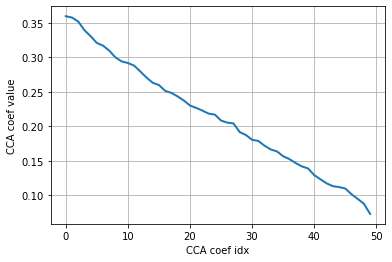

In [26]:
# correlation coefficients
plot_helper(results["cca_coef1"], "CCA coef idx", "CCA coef value")